In [3]:
import warnings
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [12]:
os.chdir('E:\PROJECTS\dsmlbc\House_Price_Prediction_odev')

In [13]:
def load_House_Price_data():
    train = pd.read_csv(r"datasets\train.csv")
    test = pd.read_csv(r"datasets\train.csv")
    data = train.append(test).reset_index()

    return data

In [14]:
df = load_House_Price_data()

In [16]:
df.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
df.tail()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2915,1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
2916,1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
2917,1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
2918,1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
2919,1459,1460,20,RL,75.000,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.000,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2920 non-null   int64  
 1   Id             2920 non-null   int64  
 2   MSSubClass     2920 non-null   int64  
 3   MSZoning       2920 non-null   object 
 4   LotFrontage    2402 non-null   float64
 5   LotArea        2920 non-null   int64  
 6   Street         2920 non-null   object 
 7   Alley          182 non-null    object 
 8   LotShape       2920 non-null   object 
 9   LandContour    2920 non-null   object 
 10  Utilities      2920 non-null   object 
 11  LotConfig      2920 non-null   object 
 12  LandSlope      2920 non-null   object 
 13  Neighborhood   2920 non-null   object 
 14  Condition1     2920 non-null   object 
 15  Condition2     2920 non-null   object 
 16  BldgType       2920 non-null   object 
 17  HouseStyle     2920 non-null   object 
 18  OverallQ

In [19]:
df.columns

Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'P

In [20]:
df.index

RangeIndex(start=0, stop=2920, step=1)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2920.000,729.500,421.538,0.000,364.750,729.500,1094.250,1459.000
Id,2920.000,730.500,421.538,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,2920.000,56.897,42.293,20.000,20.000,50.000,70.000,190.000
LotFrontage,2402.000,70.050,24.280,21.000,59.000,69.000,80.000,313.000
LotArea,2920.000,10516.828,9979.555,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,2920.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,2920.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,2920.000,1971.268,30.198,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,2920.000,1984.866,20.642,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,2904.000,103.685,181.035,0.000,0.000,0.000,166.000,1600.000


In [22]:
df.isnull().values.any()

True

In [23]:
df.isnull().sum().sort_values(ascending=False)

PoolQC          2906
MiscFeature     2812
Alley           2738
Fence           2358
FireplaceQu     1380
                ... 
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
index              0
Length: 82, dtype: int64

In [24]:
df.drop(['Id', 'index'], axis=1, inplace=True)

In [25]:
# CATEGORICAL VARIABLE ANALYSIS
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Categorical Variable Count: ', len(cat_cols))

Categorical Variable Count:  43


In [26]:
def cat_summary(data, categorical_cols, target, number_of_classes=10):
    var_count = 0
    vars_more_classes = []
    for var in categorical_cols:
        if len(df[var].value_counts()) <= number_of_classes:  # sınıf sayısına göre seç
            print(pd.DataFrame({var: data[var].value_counts(),
                                "Ratio": 100 * data[var].value_counts() / len(data),
                                "TARGET_MEDIAN": data.groupby(var)[target].median()}), end="\n\n\n")
            sns.countplot(x=var, data=data)
            plt.show()
            var_count += 1
        else:
            vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)

         MSZoning  Ratio  TARGET_MEDIAN
C (all)        20  0.685          74700
FV            130  4.452         205950
RH             32  1.096         136500
RL           2302 78.836         174000
RM            436 14.932         120500




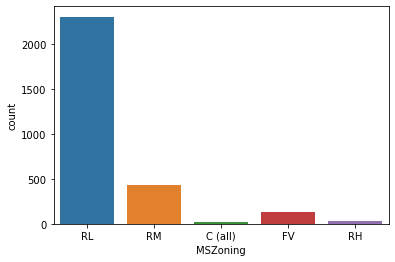

      Street  Ratio  TARGET_MEDIAN
Grvl      12  0.411         114250
Pave    2908 99.589         163000




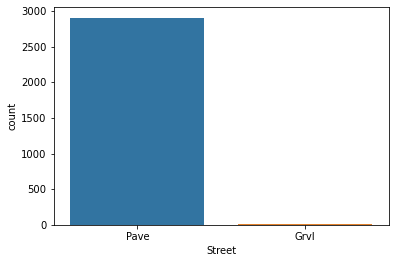

       Alley  Ratio  TARGET_MEDIAN
Alley                             
Grvl     100  3.425         119500
Pave      82  2.808         172500




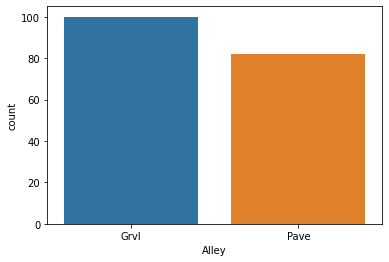

     LotShape  Ratio  TARGET_MEDIAN
IR1       968 33.151         189000
IR2        82  2.808         221000
IR3        20  0.685         203570
Reg      1850 63.356         146000




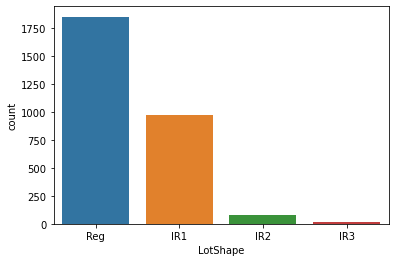

     LandContour  Ratio  TARGET_MEDIAN
Bnk          126  4.315         139400
HLS          100  3.425         222250
Low           72  2.466         190000
Lvl         2622 89.795         162900




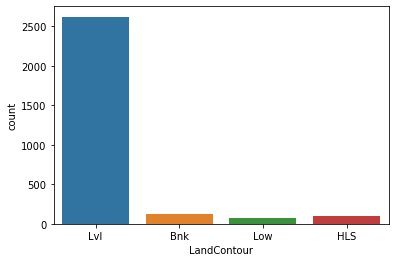

           Utilities  Ratio  TARGET_MEDIAN
Utilities                                 
AllPub          2918 99.932         163000
NoSeWa             2  0.068         137500




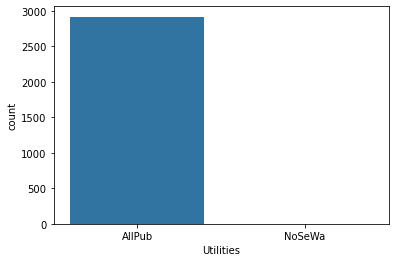

         LotConfig  Ratio  TARGET_MEDIAN
Corner         526 18.014     160000.000
CulDSac        188  6.438     199262.000
FR2             94  3.219     165000.000
FR3              8  0.274     195450.000
Inside        2104 72.055     159697.500




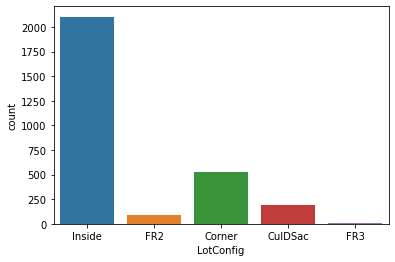

           LandSlope  Ratio  TARGET_MEDIAN
LandSlope                                 
Gtl             2764 94.658         161875
Mod              130  4.452         186700
Sev               26  0.890         185000




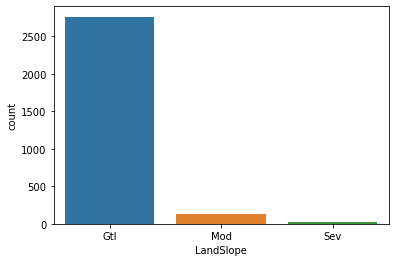

        Condition1  Ratio  TARGET_MEDIAN
Artery          96  3.288         119550
Feedr          162  5.548         140000
Norm          2520 86.301         166500
PosA            16  0.548         212500
PosN            38  1.301         200000
RRAe            22  0.753         142500
RRAn            52  1.781         171495
RRNe             4  0.137         190750
RRNn            10  0.342         214000




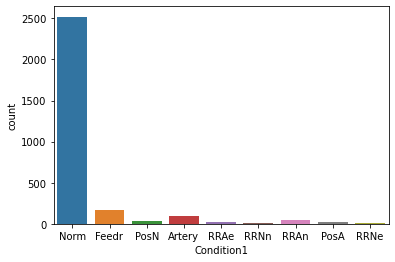

        Condition2  Ratio  TARGET_MEDIAN
Artery           4  0.137         106500
Feedr           12  0.411         127500
Norm          2890 98.973         163500
PosA             2  0.068         325000
PosN             4  0.137         284875
RRAe             2  0.068         190000
RRAn             2  0.068         136905
RRNn             4  0.137          96750




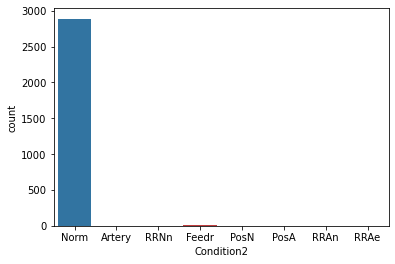

        BldgType  Ratio  TARGET_MEDIAN
1Fam        2440 83.562         167900
2fmCon        62  2.123         127500
Duplex       104  3.562         135980
Twnhs         86  2.945         137500
TwnhsE       228  7.808         172200




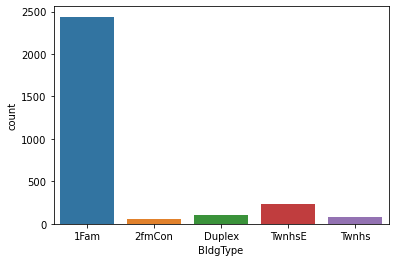

        HouseStyle  Ratio  TARGET_MEDIAN
1.5Fin         308 10.548         132000
1.5Unf          28  0.959         111250
1Story        1452 49.726         154750
2.5Fin          16  0.548         194000
2.5Unf          22  0.753         133900
2Story         890 30.479         190000
SFoyer          74  2.534         135960
SLvl           130  4.452         164500




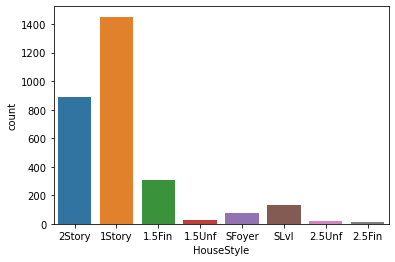

         RoofStyle  Ratio  TARGET_MEDIAN
Flat            26  0.890         185000
Gable         2282 78.151         160000
Gambrel         22  0.753         139000
Hip            572 19.589         176500
Mansard         14  0.479         175000
Shed             4  0.137         225000




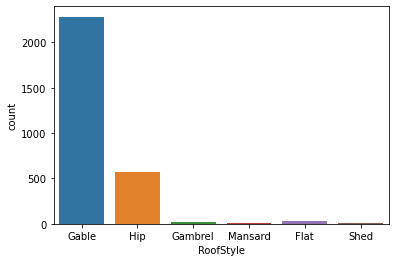

         RoofMatl  Ratio  TARGET_MEDIAN
ClyTile         2  0.068         160000
CompShg      2868 98.219         162000
Membran         2  0.068         241500
Metal           2  0.068         180000
Roll            2  0.068         137000
Tar&Grv        22  0.753         167000
WdShake        10  0.342         242000
WdShngl        12  0.411         332500




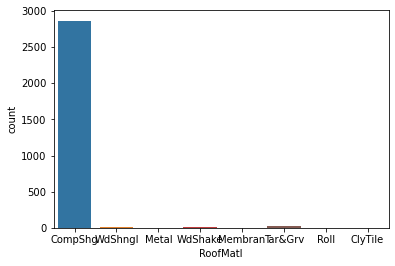

         MasVnrType  Ratio  TARGET_MEDIAN
BrkCmn           30  1.027         139000
BrkFace         890 30.479         181000
None           1728 59.178         143000
Stone           256  8.767         246839




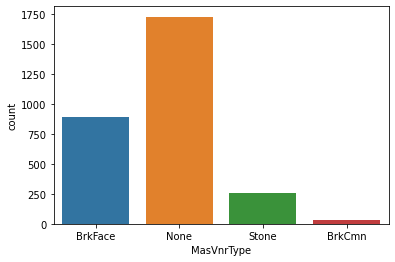

    ExterQual  Ratio  TARGET_MEDIAN
Ex        104  3.562     364606.500
Fa         28  0.959      82250.000
Gd        976 33.425     220000.000
TA       1812 62.055     139450.000




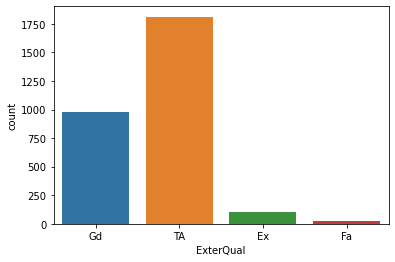

    ExterCond  Ratio  TARGET_MEDIAN
Ex          6  0.205         161000
Fa         56  1.918          95750
Gd        292 10.000         151250
Po          2  0.068          76500
TA       2564 87.808         167370




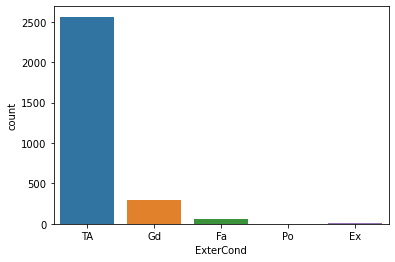

        Foundation  Ratio  TARGET_MEDIAN
BrkTil         292 10.000         125250
CBlock        1268 43.425         141500
PConc         1294 44.315         205000
Slab            48  1.644         104150
Stone           12  0.411         126500
Wood             6  0.205         164000




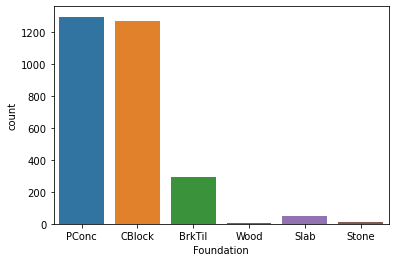

    BsmtQual  Ratio  TARGET_MEDIAN
Ex       242  8.288         318000
Fa        70  2.397         112000
Gd      1236 42.329         192070
TA      1298 44.452         135500




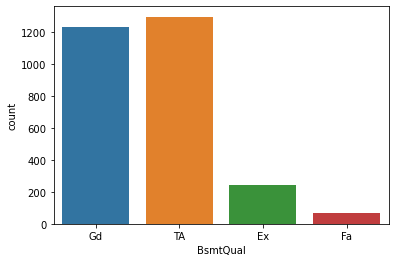

    BsmtCond  Ratio  TARGET_MEDIAN
Fa        90  3.082         118500
Gd       130  4.452         193879
Po         4  0.137          64000
TA      2622 89.795         165000




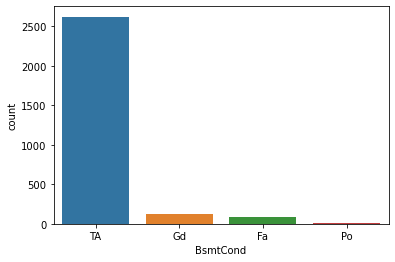

    BsmtExposure  Ratio  TARGET_MEDIAN
Av           442 15.137         185850
Gd           268  9.178         226975
Mn           228  7.808         182450
No          1906 65.274         154000




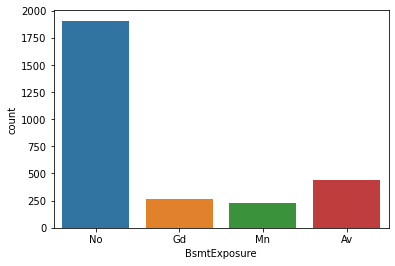

     BsmtFinType1  Ratio  TARGET_MEDIAN
ALQ           440 15.068         149250
BLQ           296 10.137         139100
GLQ           836 28.630         213750
LwQ           148  5.068         139000
Rec           266  9.110         142000
Unf           860 29.452         161750




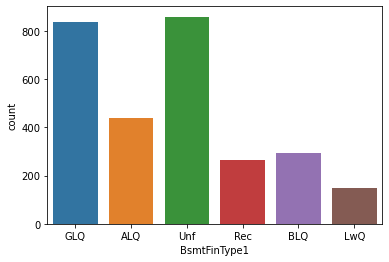

     BsmtFinType2  Ratio  TARGET_MEDIAN
ALQ            38  1.301         174900
BLQ            66  2.260         143000
GLQ            28  0.959         203125
LwQ            92  3.151         154000
Rec           108  3.699         148750
Unf          2512 86.027         167000




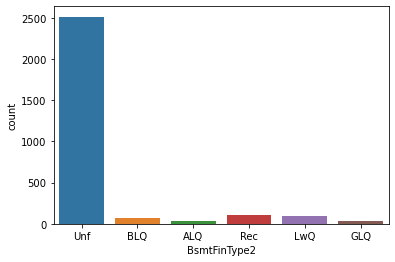

       Heating  Ratio  TARGET_MEDIAN
Floor        2  0.068          72500
GasA      2856 97.808         164500
GasW        36  1.233         134950
Grav        14  0.479          79000
OthW         4  0.137         125750
Wall         8  0.274          91450




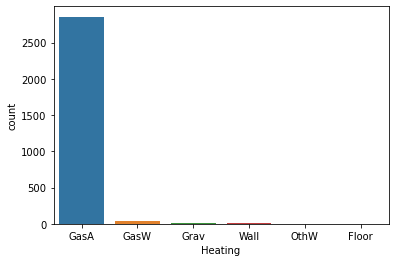

    HeatingQC  Ratio  TARGET_MEDIAN
Ex       1482 50.753         194700
Fa         98  3.356         123500
Gd        482 16.507         152000
Po          2  0.068          87000
TA        856 29.315         135000




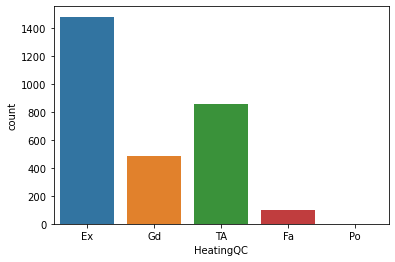

   CentralAir  Ratio  TARGET_MEDIAN
N         190  6.507          98000
Y        2730 93.493         168000




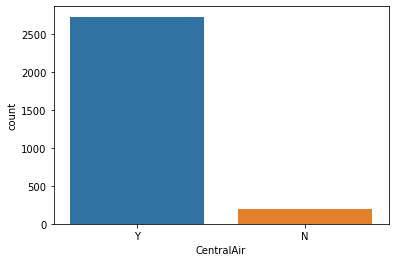

       Electrical  Ratio  TARGET_MEDIAN
FuseA         188  6.438         121250
FuseF          54  1.849         115000
FuseP           6  0.205          82000
Mix             2  0.068          67000
SBrkr        2668 91.370         170000




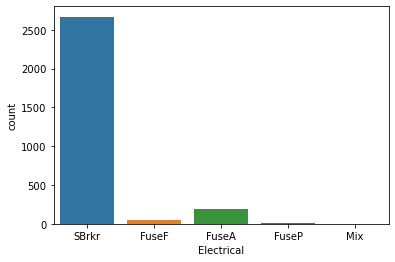

    KitchenQual  Ratio  TARGET_MEDIAN
Ex          200  6.849         316750
Fa           78  2.671         115000
Gd         1172 40.137         201400
TA         1470 50.342         137000




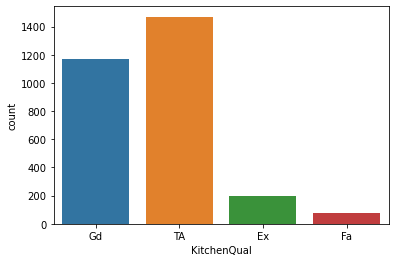

      Functional  Ratio  TARGET_MEDIAN
Maj1          28  0.959         140750
Maj2          10  0.342          85000
Min1          62  2.123         139000
Min2          68  2.329         140000
Mod           30  1.027         137900
Sev            2  0.068         129000
Typ         2720 93.151         165500




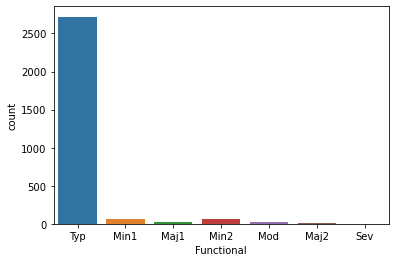

    FireplaceQu  Ratio  TARGET_MEDIAN
Ex           48  1.644         314250
Fa           66  2.260         158000
Gd          760 26.027         206950
Po           40  1.370         131500
TA          626 21.438         187500




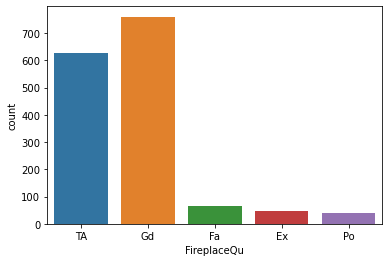

         GarageType  Ratio  TARGET_MEDIAN
2Types           12  0.411         159000
Attchd         1740 59.589         185000
Basment          38  1.301         148000
BuiltIn         176  6.027         227500
CarPort          18  0.616         108000
Detchd          774 26.507         129500




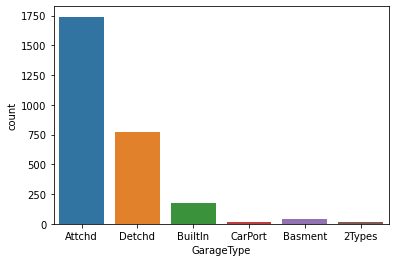

     GarageFinish  Ratio  TARGET_MEDIAN
Fin           704 24.110         215000
RFn           844 28.904         190000
Unf          1210 41.438         135000




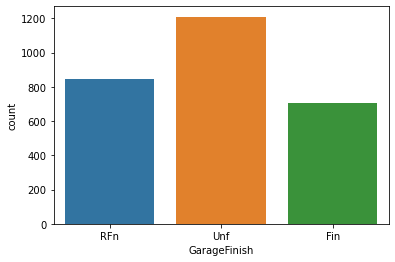

    GarageQual  Ratio  TARGET_MEDIAN
Ex           6  0.205         127500
Fa          96  3.288         115000
Gd          28  0.959         209115
Po           6  0.205          96500
TA        2622 89.795         170000




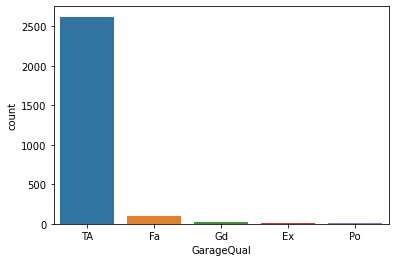

    GarageCond  Ratio  TARGET_MEDIAN
Ex           4  0.137         124000
Fa          70  2.397         114504
Gd          18  0.616         148000
Po          14  0.479         108000
TA        2652 90.822         170000




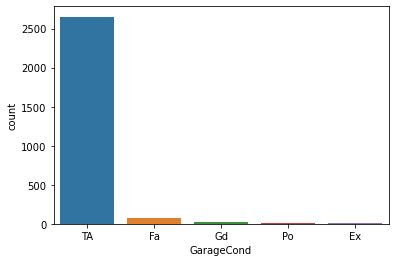

   PavedDrive  Ratio  TARGET_MEDIAN
N         180  6.164         111000
P          60  2.055         132250
Y        2680 91.781         168500




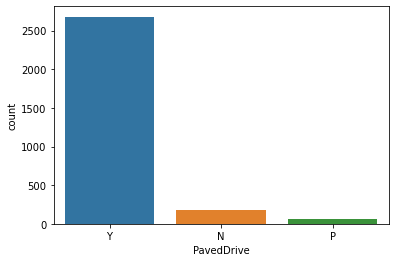

    PoolQC  Ratio  TARGET_MEDIAN
Ex       4  0.137         490000
Fa       4  0.137         215500
Gd       6  0.205         171000




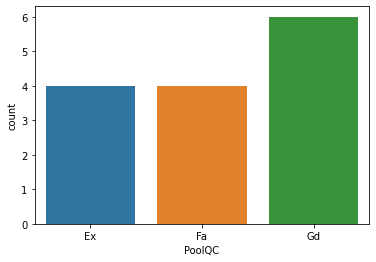

       Fence  Ratio  TARGET_MEDIAN
GdPrv    118  4.041         167500
GdWo     108  3.699         138750
MnPrv    314 10.753         137450
MnWw      22  0.753         130000




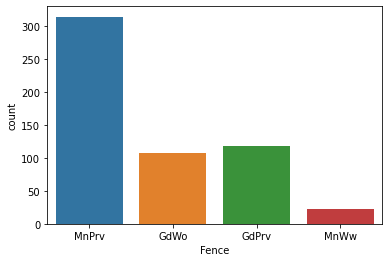

      MiscFeature  Ratio  TARGET_MEDIAN
Gar2            4  0.137         170750
Othr            4  0.137          94000
Shed           98  3.356         144000
TenC            2  0.068         250000




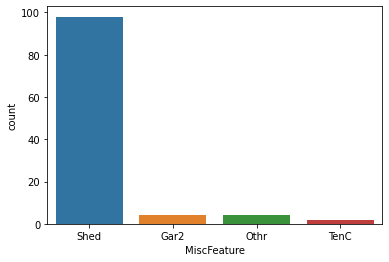

       SaleType  Ratio  TARGET_MEDIAN
COD          86  2.945         139000
CWD           8  0.274         188750
Con           4  0.137         269600
ConLD        18  0.616         140000
ConLI        10  0.342         125000
ConLw        10  0.342         144000
New         244  8.356         247453
Oth           6  0.205         116050
WD         2534 86.781         158000




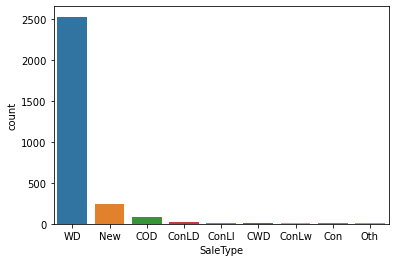

         SaleCondition  Ratio  TARGET_MEDIAN
Abnorml            202  6.918         130000
AdjLand              8  0.274         104000
Alloca              24  0.822         148145
Family              40  1.370         140500
Normal            2396 82.055         160000
Partial            250  8.562         244600




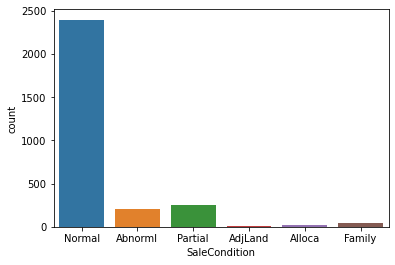

40 categorical variables have been described

There are 3 variables have more than 10 classes

Variable names have more than 10 classes:

['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [27]:
cat_summary(df, cat_cols, "SalePrice")

In [28]:
# variables have more than 10 classes:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    print(df[col].value_counts())

NAmes      450
CollgCr    300
OldTown    226
Edwards    200
Somerst    172
Gilbert    158
NridgHt    154
Sawyer     148
NWAmes     146
SawyerW    118
BrkSide    116
Crawfor    102
Mitchel     98
NoRidge     82
Timber      76
IDOTRR      74
ClearCr     56
StoneBr     50
SWISU       50
MeadowV     34
Blmngtn     34
BrDale      32
Veenker     22
NPkVill     18
Blueste      4
Name: Neighborhood, dtype: int64
VinylSd    1030
HdBoard     444
MetalSd     440
Wd Sdng     412
Plywood     216
CemntBd     122
BrkFace     100
WdShing      52
Stucco       50
AsbShng      40
Stone         4
BrkComm       4
ImStucc       2
CBlock        2
AsphShn       2
Name: Exterior1st, dtype: int64
VinylSd    1008
MetalSd     428
HdBoard     414
Wd Sdng     394
Plywood     284
CmentBd     120
Wd Shng      76
Stucco       52
BrkFace      50
AsbShng      40
ImStucc      20
Brk Cmn      14
Stone        10
AsphShn       6
CBlock        2
Other         2
Name: Exterior2nd, dtype: int64


Numerical Variables Count:  37


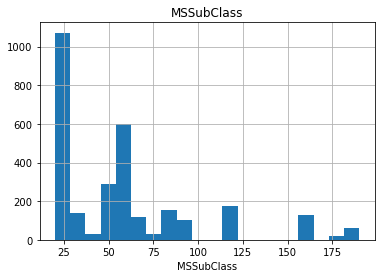

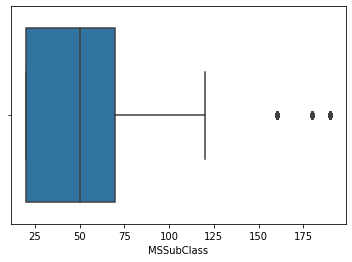

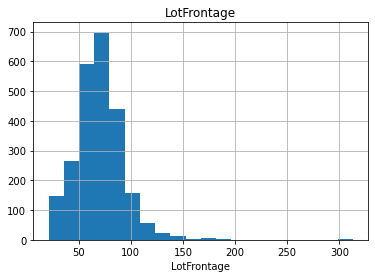

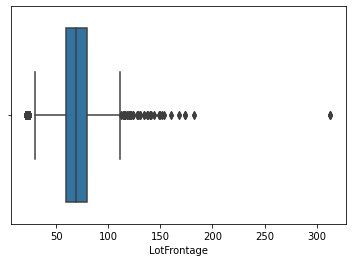

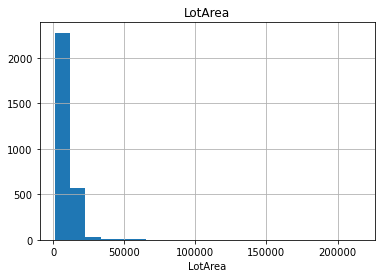

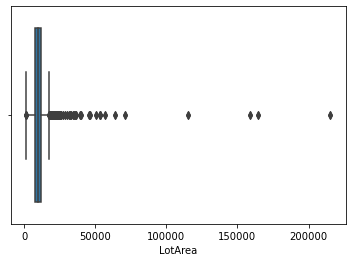

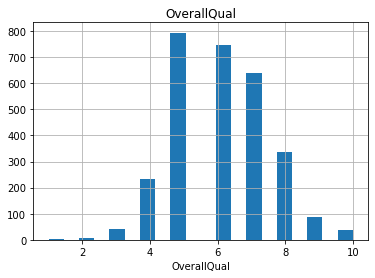

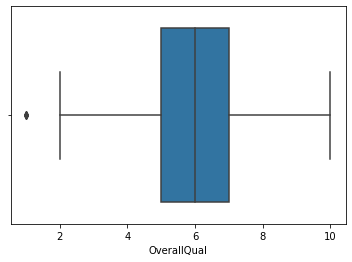

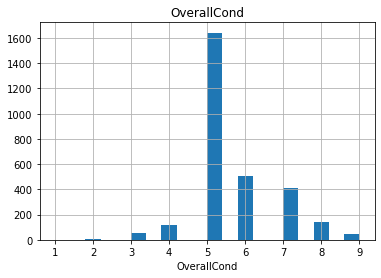

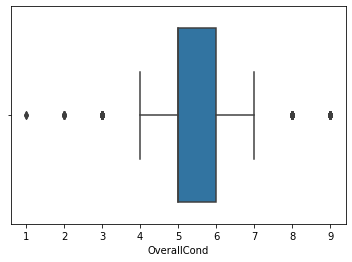

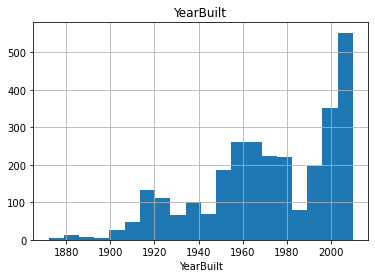

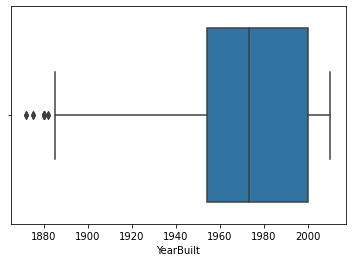

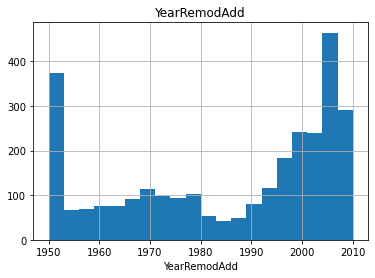

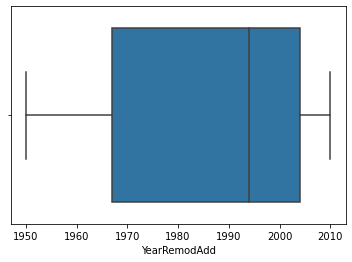

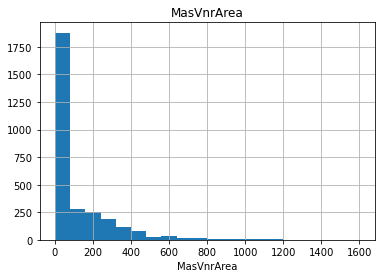

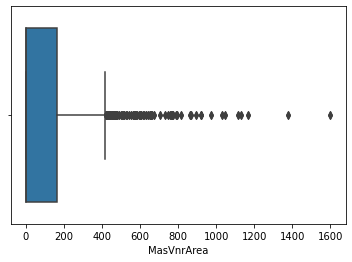

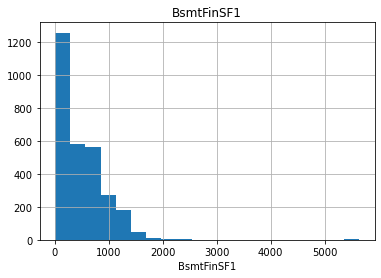

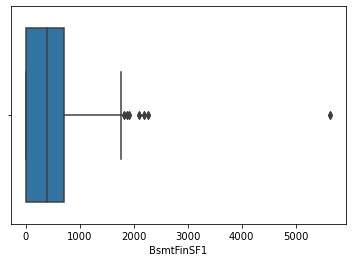

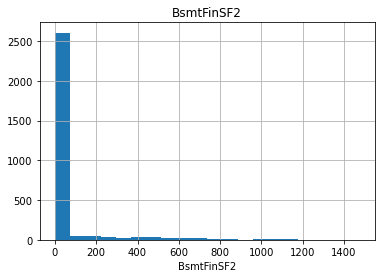

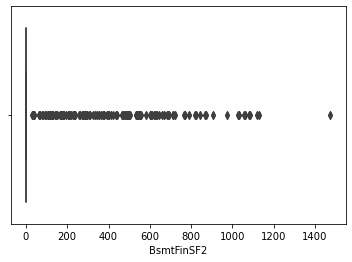

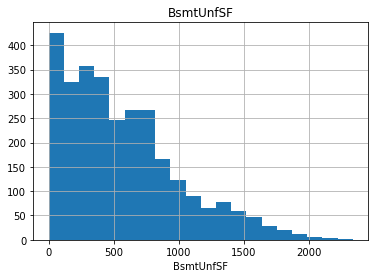

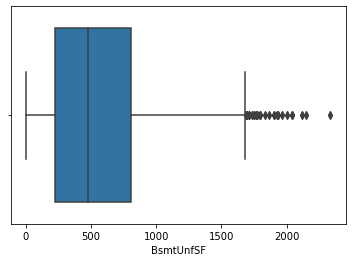

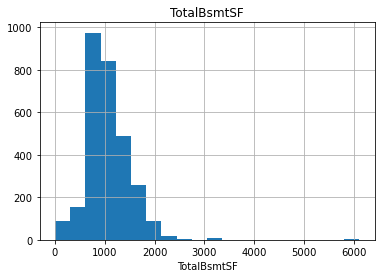

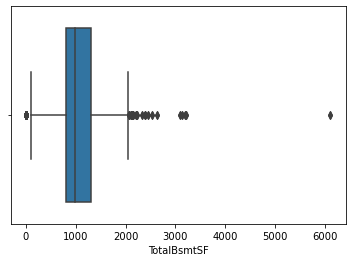

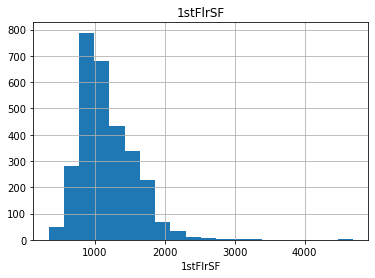

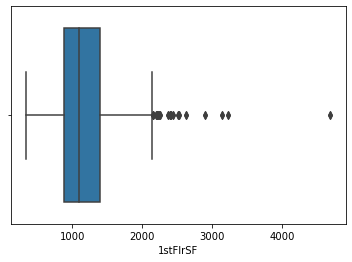

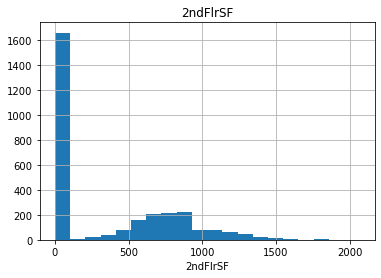

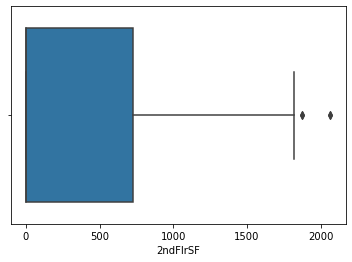

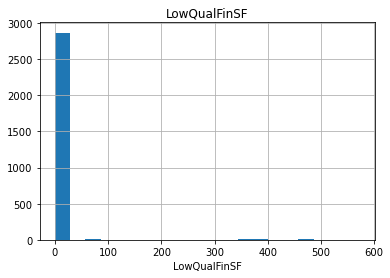

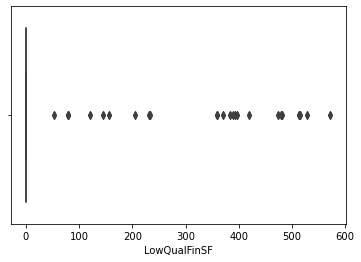

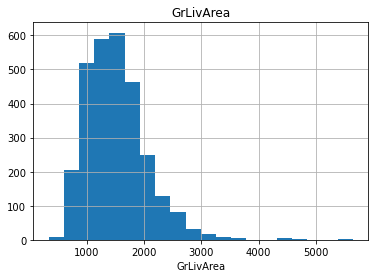

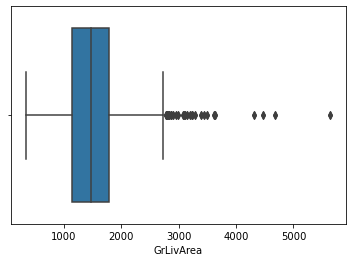

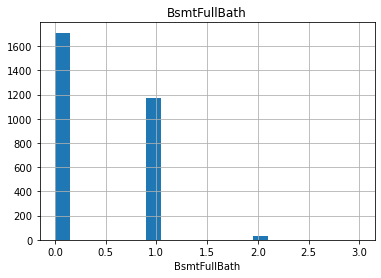

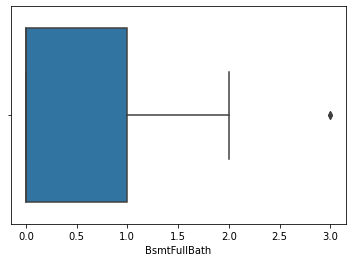

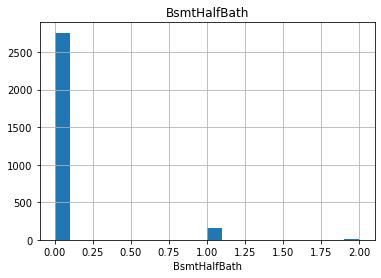

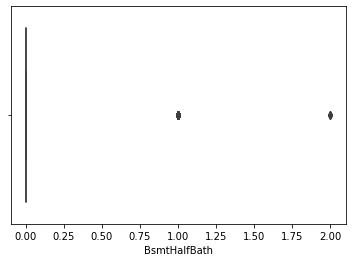

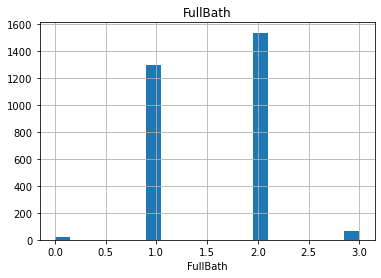

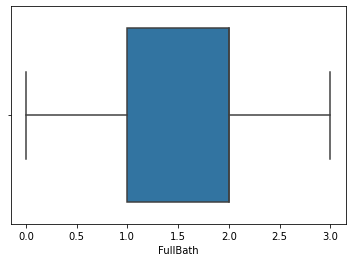

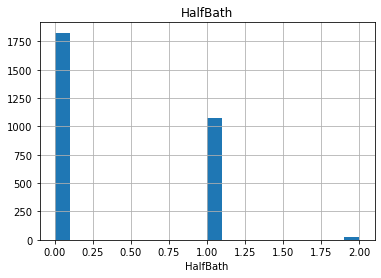

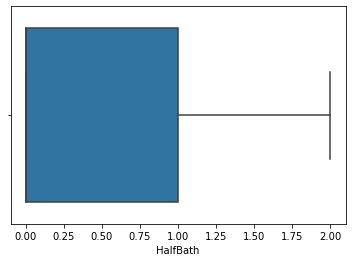

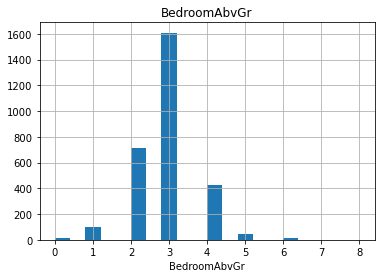

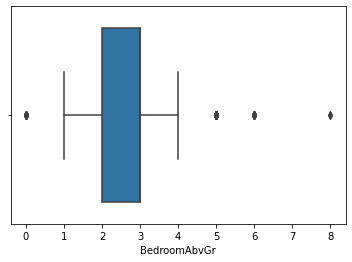

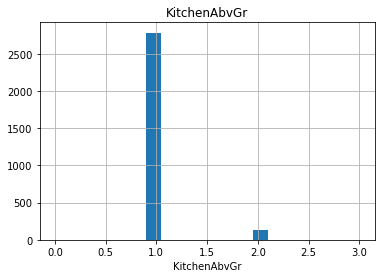

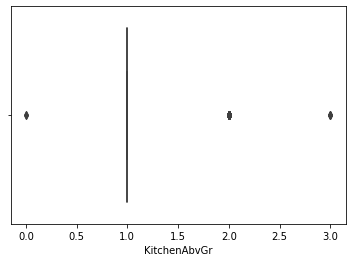

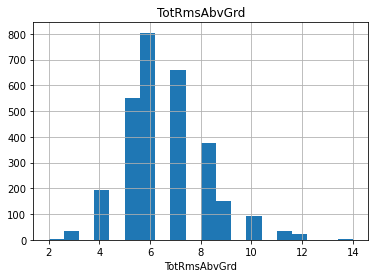

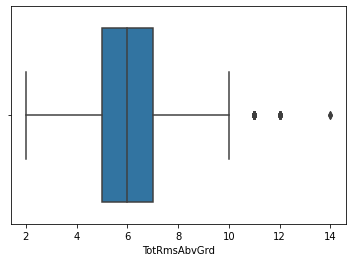

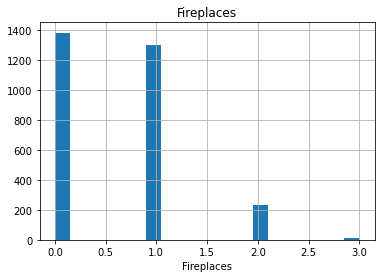

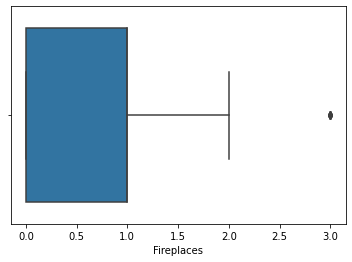

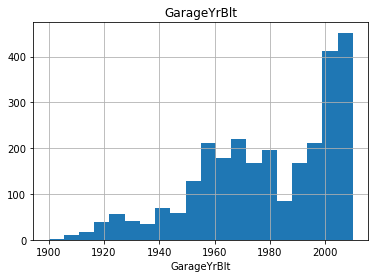

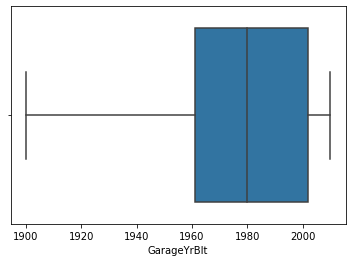

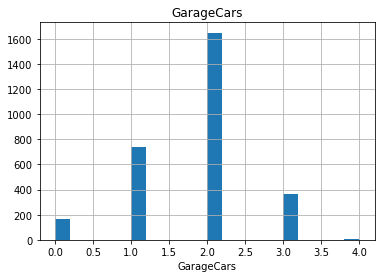

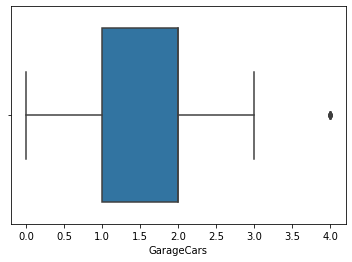

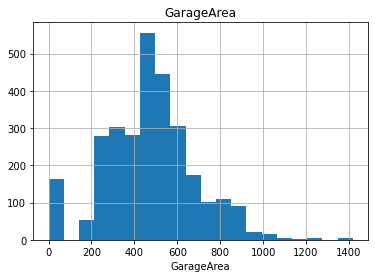

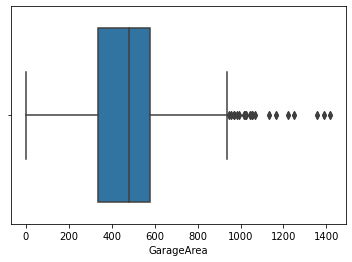

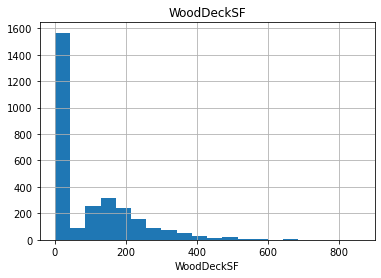

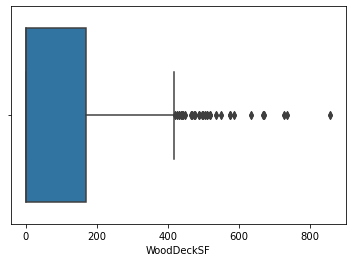

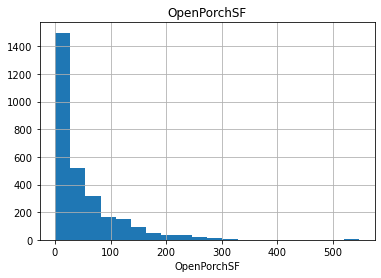

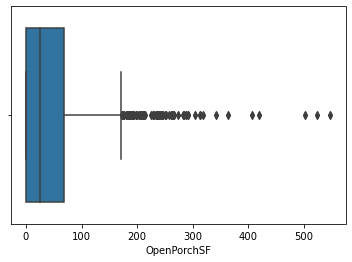

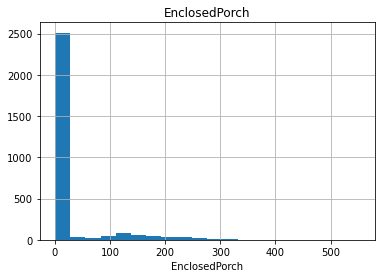

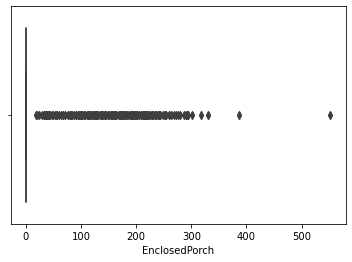

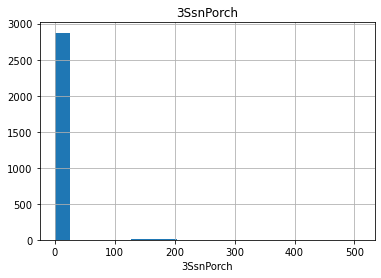

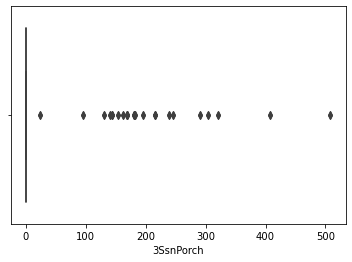

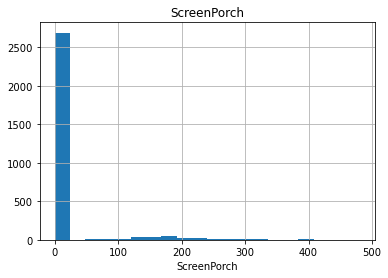

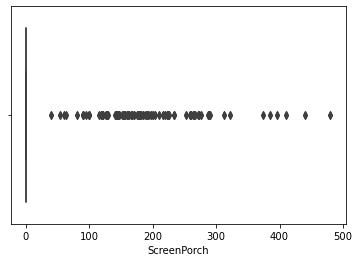

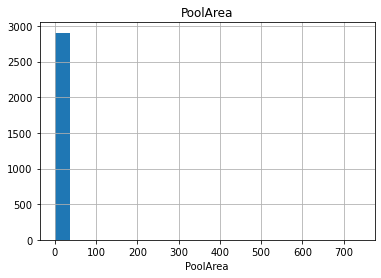

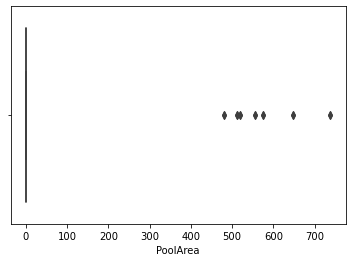

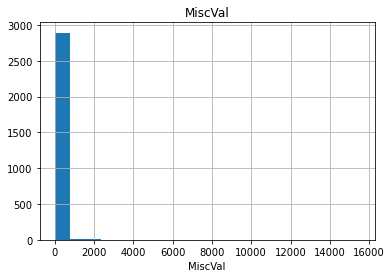

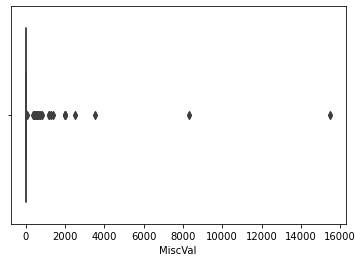

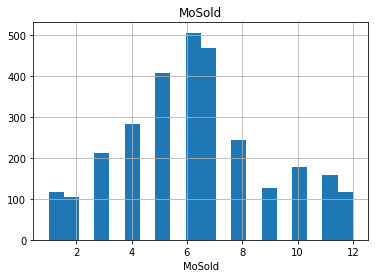

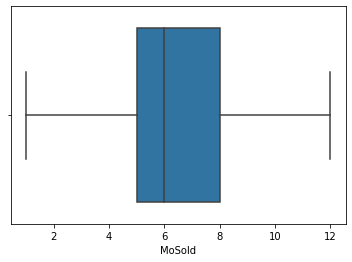

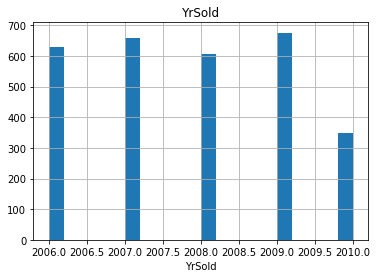

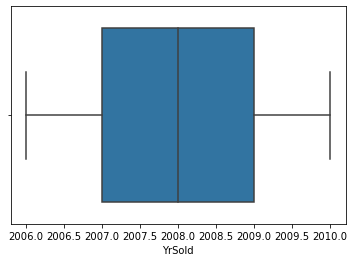

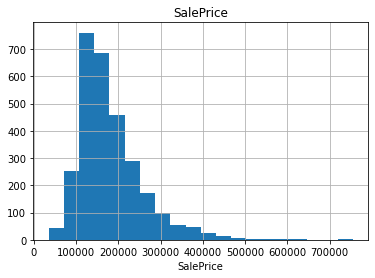

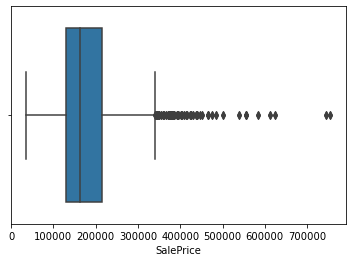

37 variables have been plotted


In [29]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
print('Numerical Variables Count: ', len(num_cols))


def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        sns.boxplot(x=df[col]);
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)

In [30]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w',
                      cmap='RdBu')
    plt.show()

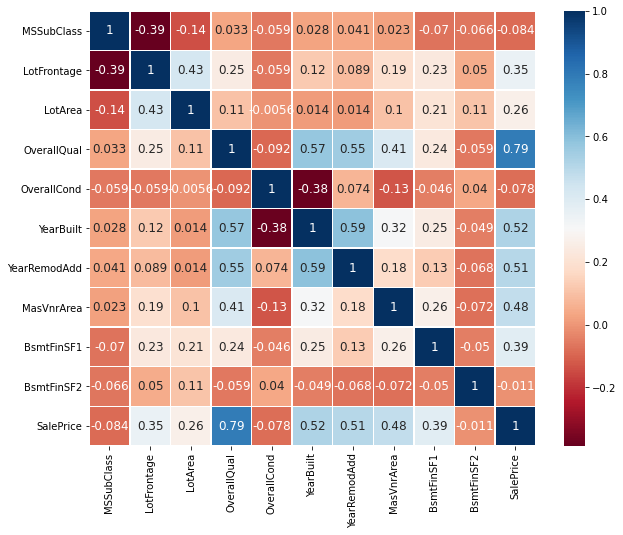

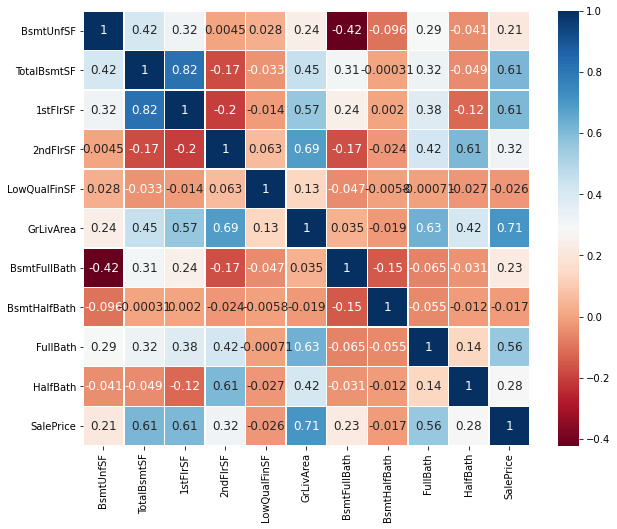

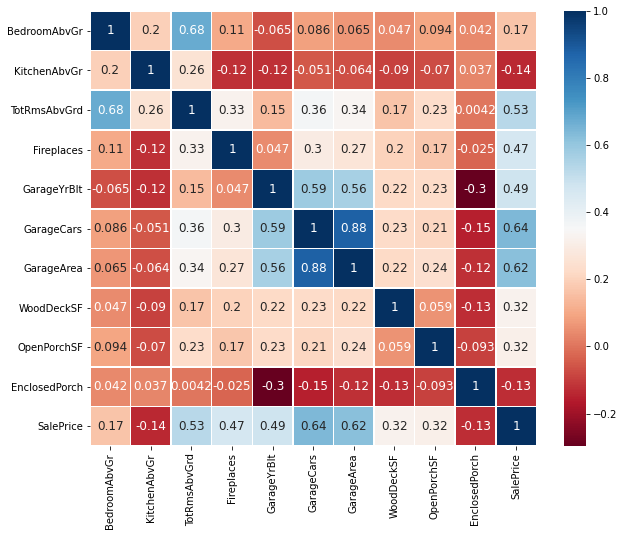

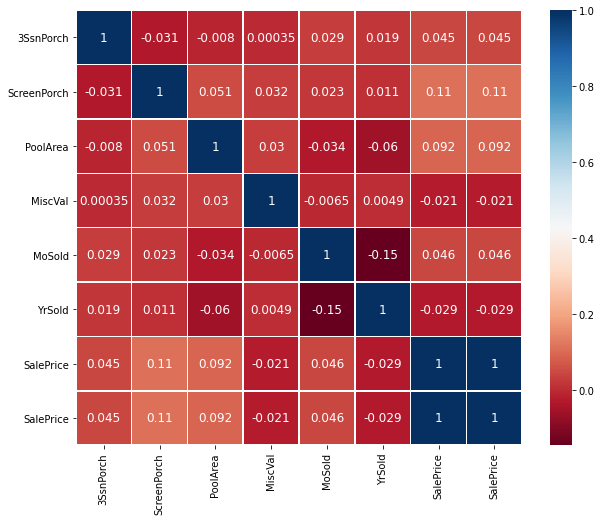

In [31]:
correlation_matrix(df, (num_cols[0:10] + ['SalePrice']))
correlation_matrix(df, (num_cols[10:20] + ['SalePrice']))
correlation_matrix(df, (num_cols[20:30] + ['SalePrice']))
correlation_matrix(df, (num_cols[30:] + ['SalePrice']))

In [32]:
df["SalePrice"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

count     2920.000
mean    180921.196
std      79428.894
min      34900.000
5%       88000.000
10%     106475.000
25%     129975.000
50%     163000.000
75%     214000.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     445071.410
max     755000.000
Name: SalePrice, dtype: float64

In [33]:
def find_correlation(dataframe, corr_limit=0.60):
    high_correlations = []
    low_correlations = []
    for col in num_cols:
        if col == "SalePrice":
            pass

        else:
            correlation = dataframe[[col, "SalePrice"]].corr().loc[col, "SalePrice"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col)
            else:
                low_correlations.append(col)
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df)

print('Variables have low correlation with target:')
print('-' * 44)
print(low_corrs)
print('Variables have high correlation with target:')
print('-' * 44)
print(high_corrs)

MSSubClass -0.08428413512659554
LotFrontage 0.35179909657067754
LotArea 0.26384335387140573
OverallQual 0.7909816005838
OverallCond -0.07785589404867758
YearBuilt 0.5228973328794957
YearRemodAdd 0.5071009671113853
MasVnrArea 0.47749304709571655
BsmtFinSF1 0.38641980624215494
BsmtFinSF2 -0.011378121450215219
BsmtUnfSF 0.21447910554696817
TotalBsmtSF 0.6135805515591948
1stFlrSF 0.6058521846919136
2ndFlrSF 0.3193338028320658
LowQualFinSF -0.02560613000068036
GrLivArea 0.70862447761265
BsmtFullBath 0.2271222331314992
BsmtHalfBath -0.01684415429735885
FullBath 0.5606637627484337
HalfBath 0.2841076755947826
BedroomAbvGr 0.16821315430073688
KitchenAbvGr -0.13590737084214496
TotRmsAbvGrd 0.5337231555820267
Fireplaces 0.46692883675152175
GarageYrBlt 0.4863616774878631
GarageCars 0.640409197258342
GarageArea 0.6234314389183597
WoodDeckSF 0.3244134445681337
OpenPorchSF 0.31585622711605477
EnclosedPorch -0.12857795792595644
3SsnPorch 0.04458366533574817
ScreenPorch 0.11144657114291324
PoolArea 0.0

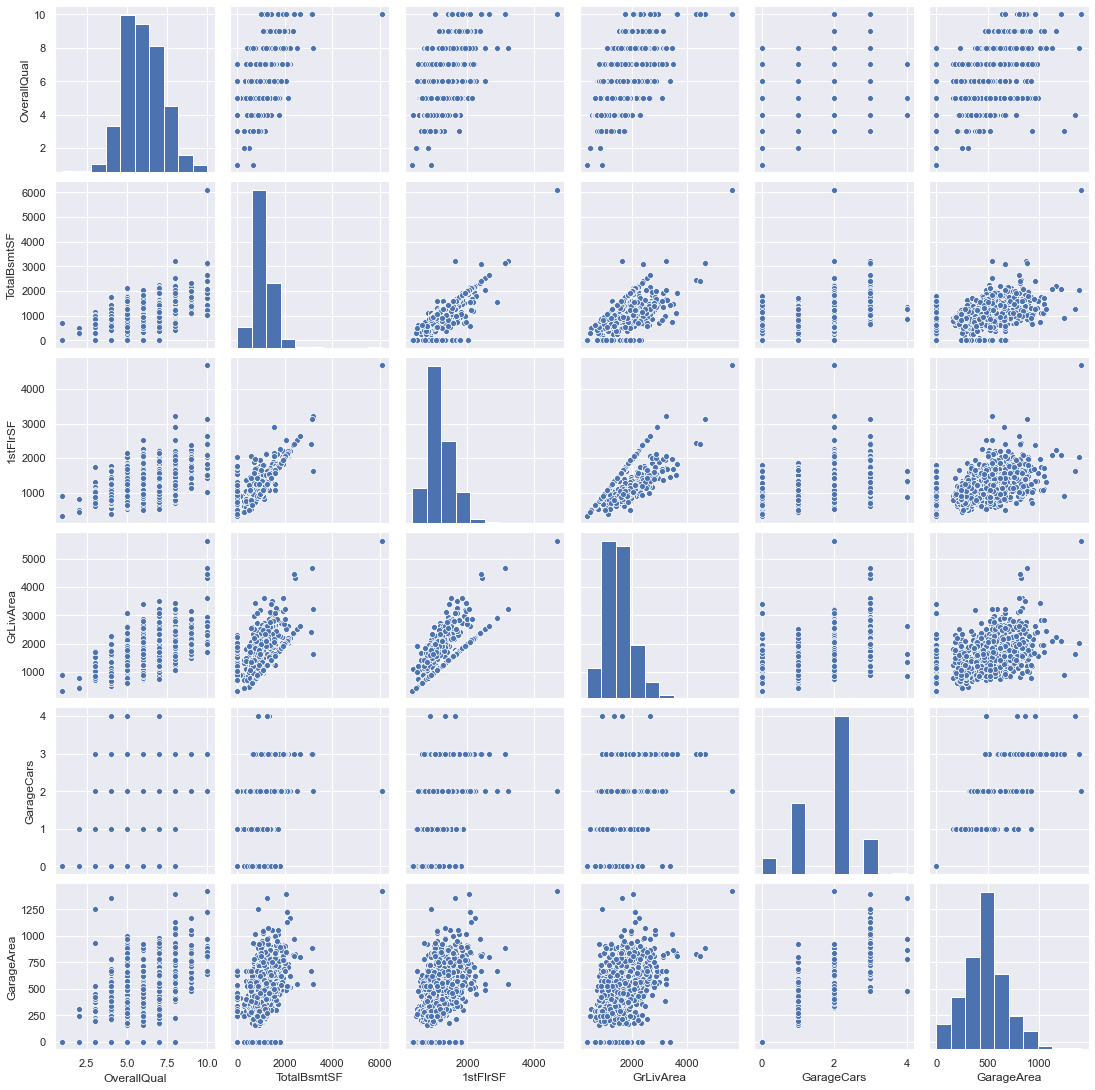

In [34]:
# Pair_plot of variables that have high correlation with target data
sns.set()
sns.pairplot(df[high_corrs], height=2.5)
plt.show()
